In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from wordcloud import WordCloud

In [4]:
train=pd.read_csv('/content/train_v2_drcat_02.csv')
train_1 = pd.read_csv("/content/Training_Essay_Data.csv")

In [5]:
train.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [6]:
train_1.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


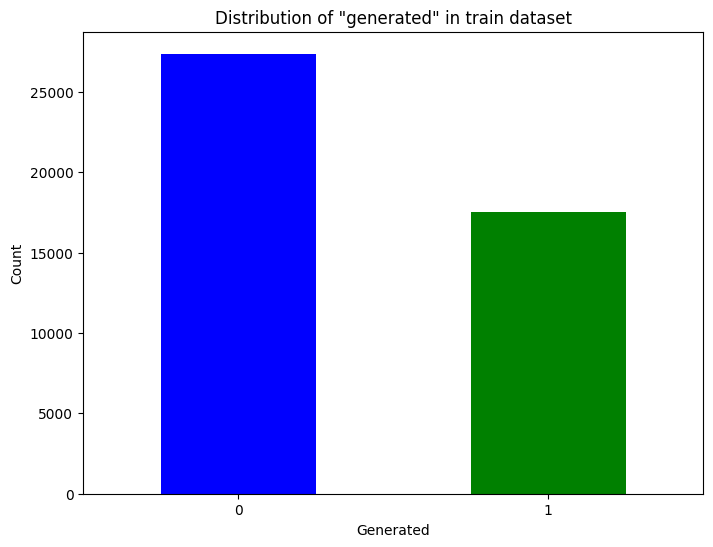

In [7]:
# Plot for train dataset
plt.figure(figsize=(8, 6))
train['label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

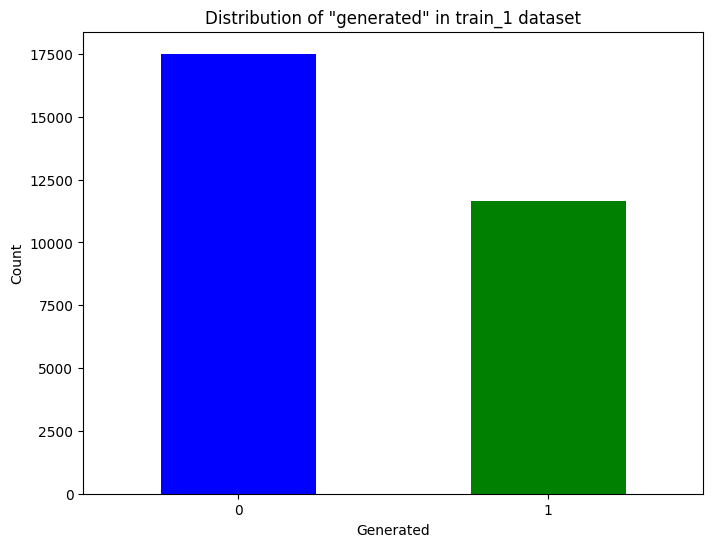

In [8]:
# Plot for train_1 dataset
plt.figure(figsize=(8, 6))
train_1['generated'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train_1 dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
import pandas as pd

train_selected = train[['text', 'label']].copy()

train_1_selected = train_1[['text', 'generated']].rename(columns={'generated': 'label'}).copy()

combined_data = pd.concat([train_selected, train_1_selected], ignore_index=True)

print(combined_data)

                                                    text  label
0      Phones\n\nModern humans today are always on th...      0
1      This essay will explain if drivers should or s...      0
2      Driving while the use of cellular devices\n\nT...      0
3      Phones & Driving\n\nDrivers should not be able...      0
4      Cell Phone Operation While Driving\n\nThe abil...      0
...                                                  ...    ...
74008  There has been a fuss about the Elector Colleg...      0
74009  Limiting car usage has many advantages. Such a...      0
74010  There's a new trend that has been developing f...      0
74011  As we all know cars are a big part of our soci...      0
74012  Cars have been around since the 1800's and hav...      0

[74013 rows x 2 columns]


In [10]:
combined_data.head()

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [14]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB


In [15]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74013 entries, 0 to 74012
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    74013 non-null  object
 1   label   74013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


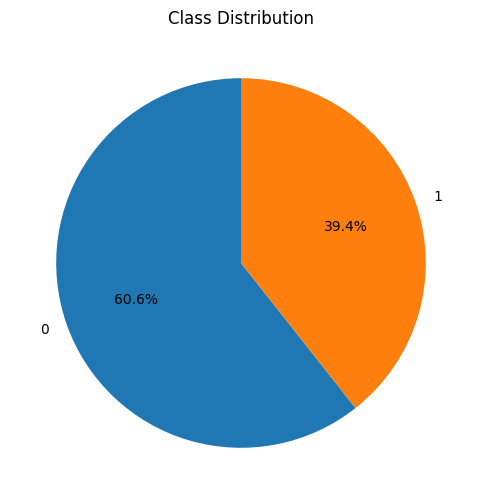

In [16]:
import matplotlib.pyplot as plt

class_distribution = combined_data['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()

In [18]:
combined_data.isnull().sum()

,0
text,0
label,0


In [21]:
duplicate= combined_data[combined_data.duplicated()]
print(duplicate)


                                                    text  label
44890    A Path to Sustainable Urban Futures  In a wo...      1
44904    A Vision for Sustainable Urban Transformatio...      1
44912    A Path to Sustainable Urban Living  In a wor...      1
44917  Advantages of Limiting Car Usage \n\nLimiting ...      1
44918  Advantages of Limiting Car Usage\n\nLimiting c...      1
...                                                  ...    ...
74008  There has been a fuss about the Elector Colleg...      0
74009  Limiting car usage has many advantages. Such a...      0
74010  There's a new trend that has been developing f...      0
74011  As we all know cars are a big part of our soci...      0
74012  Cars have been around since the 1800's and hav...      0

[8424 rows x 2 columns]


In [22]:
combined_data.drop_duplicates(inplace=True)
combined_data.dropna(inplace=True)

In [23]:
combined_data.shape

(65589, 2)

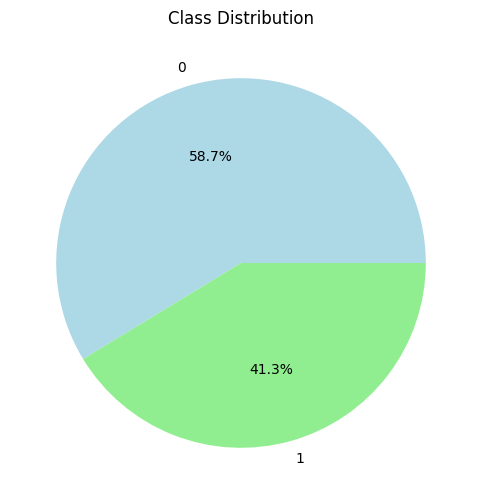

In [24]:
class_distribution = combined_data['label'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

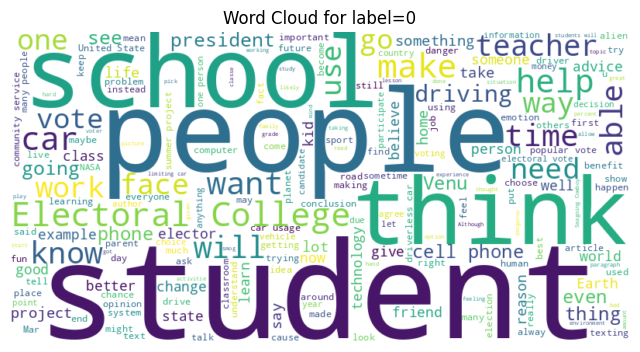

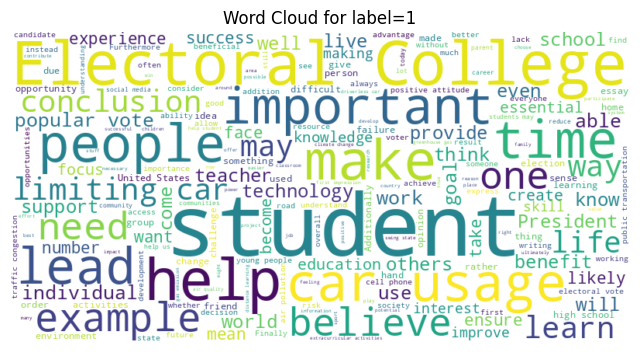

In [26]:
label_0 = ' '.join(combined_data[combined_data['label'] == 0]['text'])
label_1 = ' '.join(combined_data[combined_data['label'] == 1]['text'])

wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(label_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(label_1)

# Plotting word cloud for label=0
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('Word Cloud for label=0')
plt.axis('off')
plt.show()

# Plotting word cloud for label=1
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for label=1')
plt.axis('off')
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(combined_data['text'])

tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df.head())

    00       000   10  100   11  114  118   12   13   14  ...      your  \
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.195554   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3  0.0  0.059503  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

   yours  yourself  youth  youtube  zip  zone  zones  zoos  zygomatic  
0    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
1    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
2    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
3    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
4    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  

[5 rows x 5000 columns]


In [28]:
# Split the data into training and testing sets
X = tfidf_df.values  # Features (TF-IDF vectors)
y = combined_data['label'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [31]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
z = model.fit(X_train, y_train_encoded, epochs = 10, batch_size = 32, validation_data = (X_test, y_test_encoded))

Epoch 1/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9393 - loss: 0.1344 - val_accuracy: 0.9944 - val_loss: 0.0197
Epoch 2/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9960 - loss: 0.0131 - val_accuracy: 0.9944 - val_loss: 0.0191
Epoch 3/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9980 - loss: 0.0067 - val_accuracy: 0.9946 - val_loss: 0.0189
Epoch 4/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy: 0.9946 - val_loss: 0.0230
Epoch 5/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9988 - loss: 0.0034 - val_accuracy: 0.9941 - val_loss: 0.0266
Epoch 6/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9987 - loss: 0.0033 - val_accuracy: 0.9947 - val_loss: 0.0235
Epoch 7/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9944 - val_loss: 0.0271
Epoch 8/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9992 - loss: 0.0022 -

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy:.4f}')

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9932 - loss: 0.0521
Test Accuracy: 0.9939


In [34]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7648
           1       1.00      0.99      0.99      5470

    accuracy                           0.99     13118
   macro avg       0.99      0.99      0.99     13118
weighted avg       0.99      0.99      0.99     13118

ROC-AUC Score: 0.9995


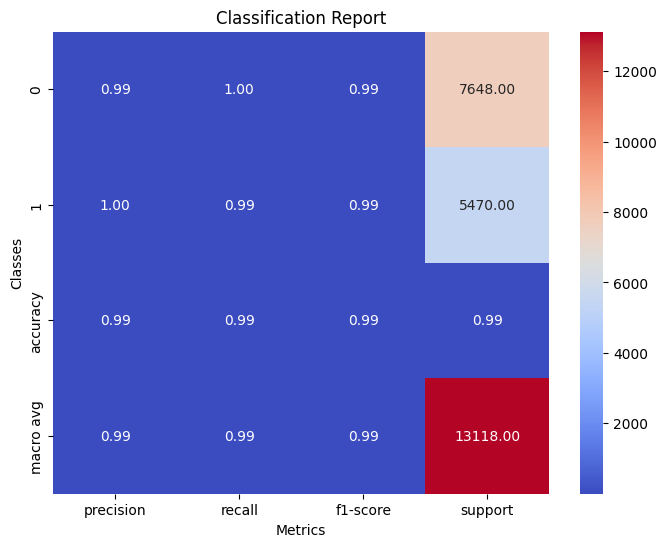

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_test_encoded, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

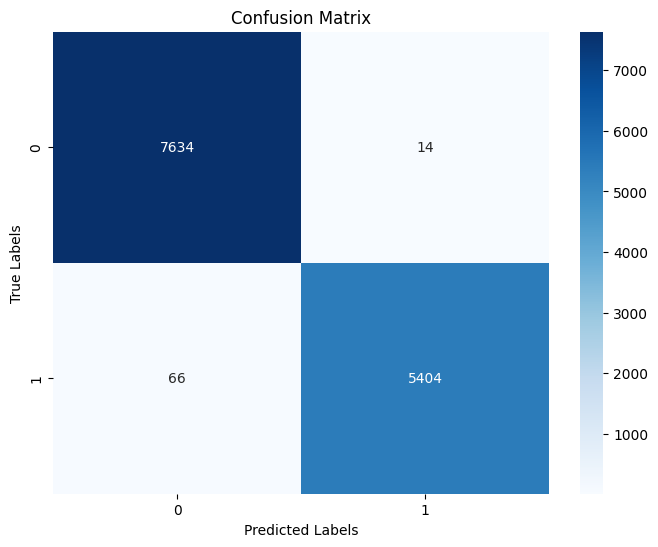

In [36]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [37]:
import pickle

# Save the TF-IDF tokenizer
with open('tfidf_tokenizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save the trained model
model.save('text_classification_model.h5')

In [41]:
import pickle
from tensorflow.keras.models import load_model

with open('tfidf_tokenizer.pkl', 'rb') as f:
      tfidf_tokenizer = pickle.load(f)

# Load the trained model
loaded_model = load_model('text_classification_model.h5')

def outcome(text):
  text_features = tfidf_tokenizer.transform([text])
  prediction = loaded_model.predict(text_features)
  return int(prediction[0][0])

text = """ The Nature of Creativity

Creativity is the essence of human innovation, a spark that ignites the imagination and leads to new ideas, art, and solutions to problems. It’s not confined to the arts alone; creativity permeates every field, from science to business, and even in our daily lives.

At its core, creativity is about seeing the world not just as it is, but as it could be. It’s the ability to connect seemingly unrelated ideas, to think outside the box, and to envision possibilities that others might overlook. For some, it’s a natural gift, a way of thinking that comes effortlessly. For others, it’s a skill that can be nurtured and developed through practice and persistence.

What makes creativity so powerful is its ability to transcend the ordinary. It challenges conventions, pushes boundaries, and leads to breakthroughs that can change the course of history. Whether through a groundbreaking scientific discovery, a piece of art that resonates with millions, or a simple solution to a complex problem, creativity has the potential to leave a lasting impact.

In a world that is constantly evolving, creativity is more important than ever. It allows us to adapt to change, to innovate in the face of challenges, and to find meaning and purpose in our endeavors. It is the driving force behind progress and the key to unlocking our full potential.

So, embrace your creativity, nurture it, and let it guide you on a journey of exploration and discovery. The possibilities are endless, and the world is waiting to see what you will create."""
if outcome(text) == 0:
  print("human written")
else:
  print("ai generated")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
ai generated
